In [129]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm


# Class 01

In [2]:
# Analysing Sales 
data_alucar = pd.read_csv("Data/Curso DS14 - Analise de Series Temporais/alucar.csv")
data_alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [20]:
#data_alucar.describe()
#data_alucar.info()
print(f"Colunas: {data_alucar.columns}")
print (f"Linhas: {data_alucar.shape[0]}, Colunas: {data_alucar.shape[1]}")
print (f"Amount of null data: {data_alucar.isna().sum().sum()}")

Colunas: Index(['mes', 'vendas'], dtype='object')
Linhas: 24, Colunas: 2
Amount of null data: 0


In [22]:
#converting month column in datetime 
data_alucar['mes'] = pd.to_datetime(data_alucar['mes'])
data_alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Text(0.5, 0, 'Months')

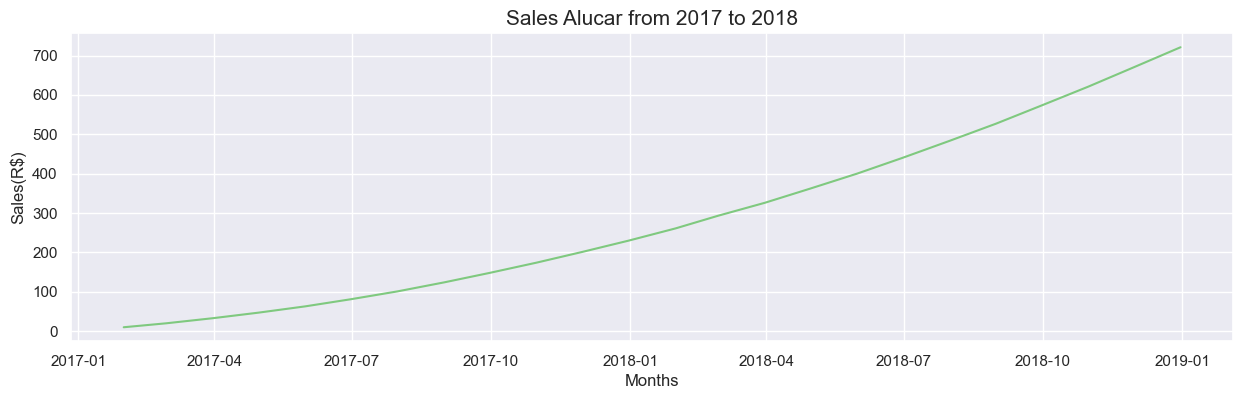

In [37]:
#ploting graph with seaborn 
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=data_alucar) #Assign the graph to a ax variable in order to remove the informatio of axes before the title.
ax.figure.set_size_inches(15,4)
ax.set_title('Sales Alucar from 2017 to 2018', loc='center', fontsize=15)
ax.set_ylabel('Sales(R$)', fontsize=12)
ax.set_xlabel('Months', fontsize=12)

# Class 2

In [38]:
#Decomposing the sales
data_alucar['sales_increase'] = data_alucar['vendas'].diff()
data_alucar.head()

,mes,vendas,sales_increase
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


Text(0.5, 0, 'Months')

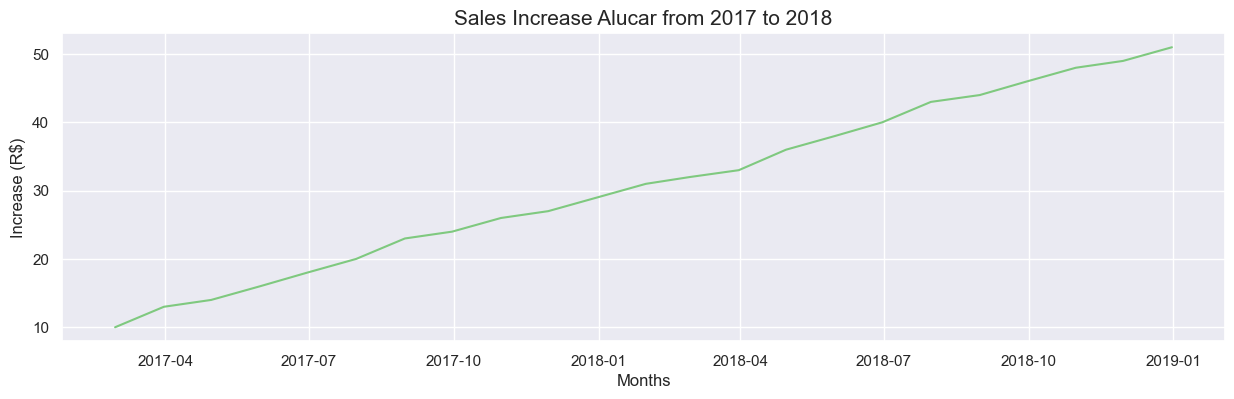

In [40]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='sales_increase', data=data_alucar) #Assign the graph to a ax variable in order to remove the informatio of axes before the title.
ax.figure.set_size_inches(15,4)
ax.set_title('Sales Increase Alucar from 2017 to 2018', loc='center', fontsize=15)
ax.set_ylabel('Increase (R$)', fontsize=12)
ax.set_xlabel('Months', fontsize=12)

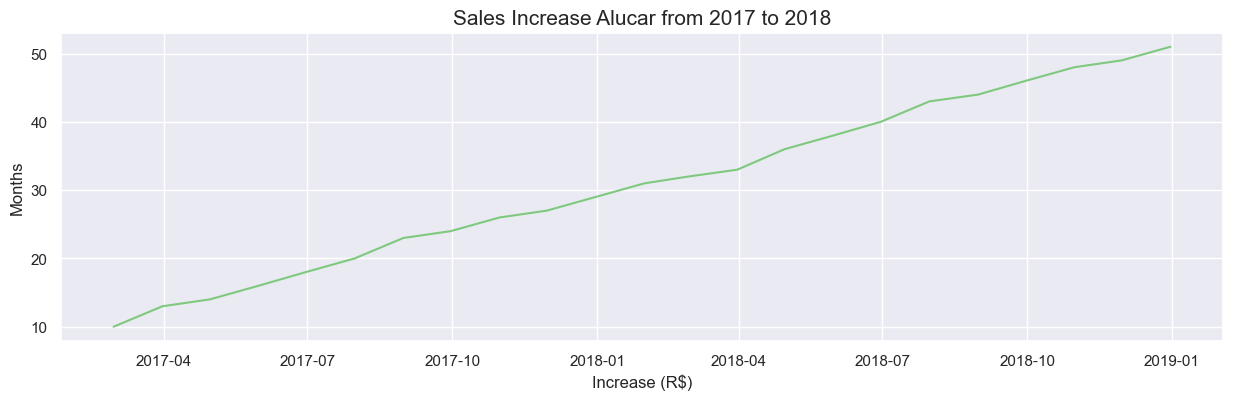

In [43]:
#creating functions to generate graph 
def plot_graph(title, x_label, y_label, dataset, column_x, column_y):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=column_x, y=column_y, data=dataset) #Assign the graph to a ax variable in order to remove the informatio of axes before the title.
    ax.figure.set_size_inches(15,4)
    ax.set_title(title, loc='center', fontsize=15)
    ax.set_ylabel(x_label, fontsize=12)
    ax.set_xlabel(y_label, fontsize=12)

plot_graph('Sales Increase Alucar from 2017 to 2018', 'Months', 'Increase (R$)', data_alucar, 'mes', 'sales_increase')

In [48]:
#Decomposing the sales increase
data_alucar['sales_increase_acceleration'] = data_alucar['sales_increase'].diff()
data_alucar.head()

,mes,vendas,sales_increase,sales_increase_acceleration
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


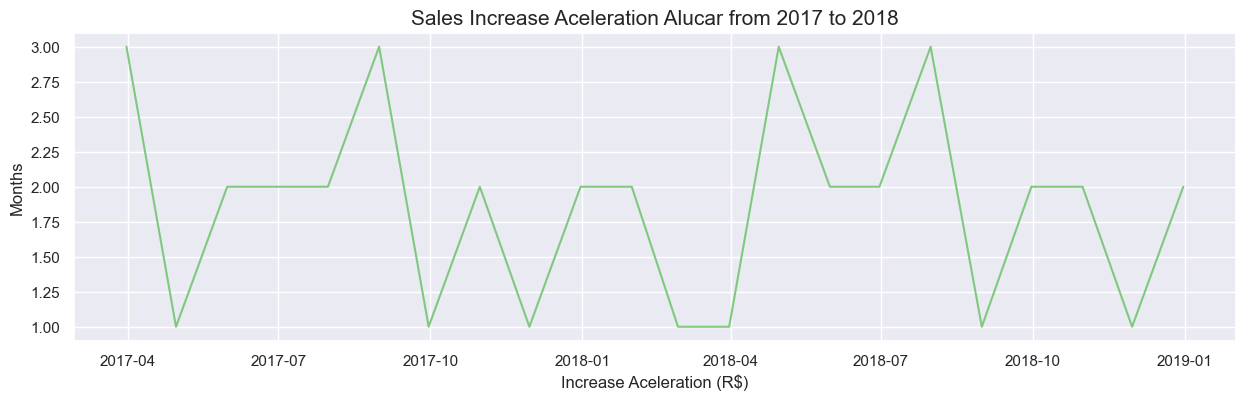

In [49]:
plot_graph('Sales Increase Aceleration Alucar from 2017 to 2018', 'Months', 'Increase Aceleration (R$)', data_alucar, 'mes', 'sales_increase_acceleration')

Text(0, 0.5, 'Sales Increase Acceleration')

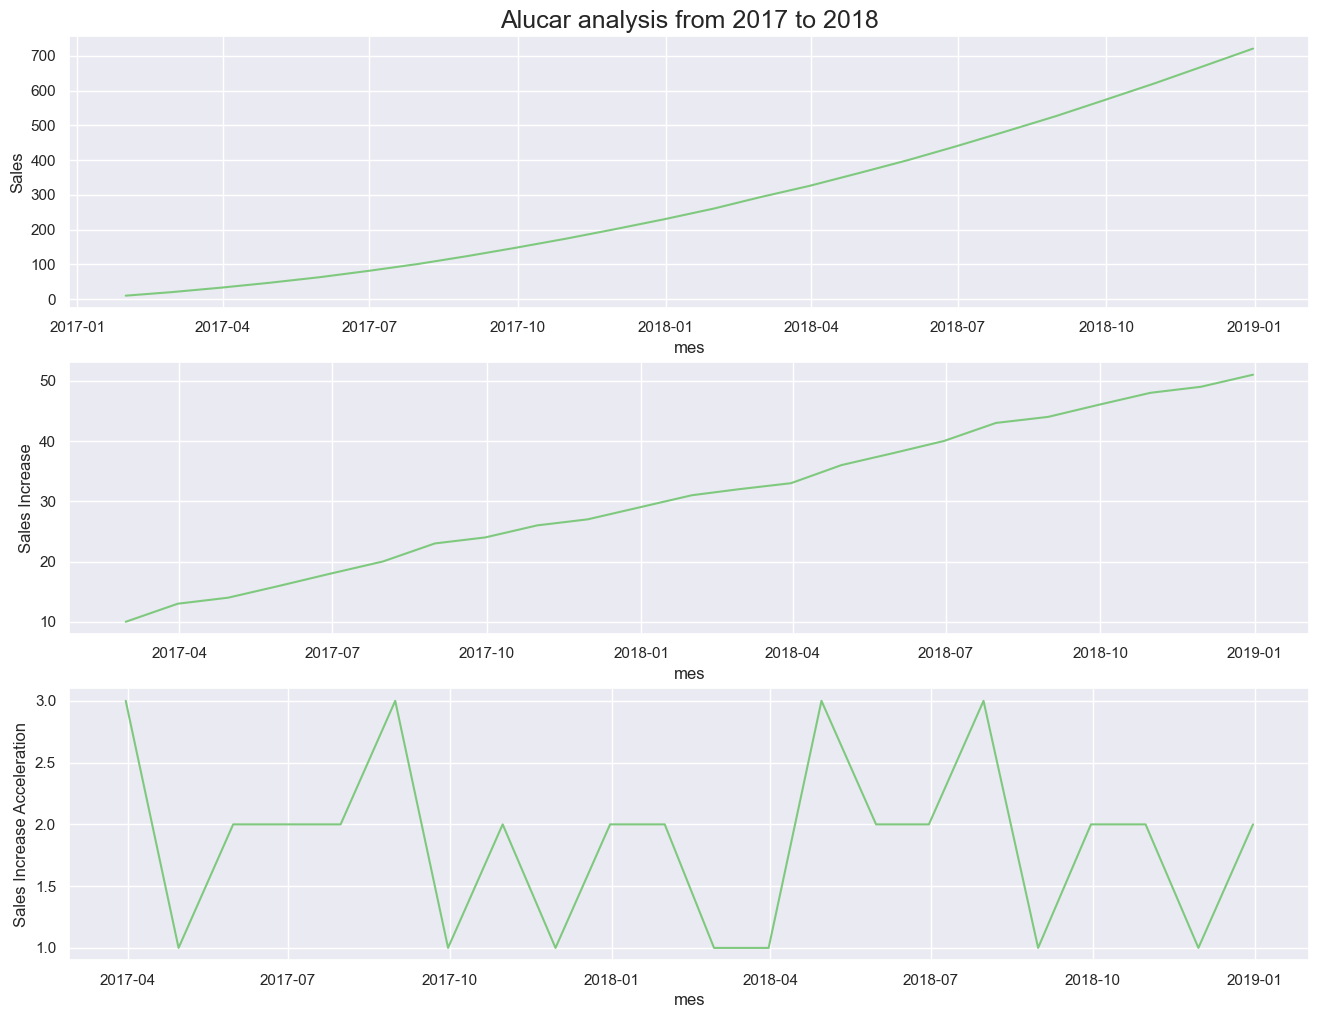

In [54]:
#Merging the plots 
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Alucar analysis from 2017 to 2018', fontsize=18, loc='center')
sns.lineplot(x='mes',y='vendas', data=data_alucar)
ax.set_ylabel('Sales')

ax = plt.subplot(3,1,2)
sns.lineplot(x='mes',y='sales_increase', data=data_alucar)
ax.set_ylabel('Sales Increase')

ax = plt.subplot(3,1,3)
sns.lineplot(x='mes',y='sales_increase_acceleration', data=data_alucar)
ax.set_ylabel('Sales Increase Acceleration')

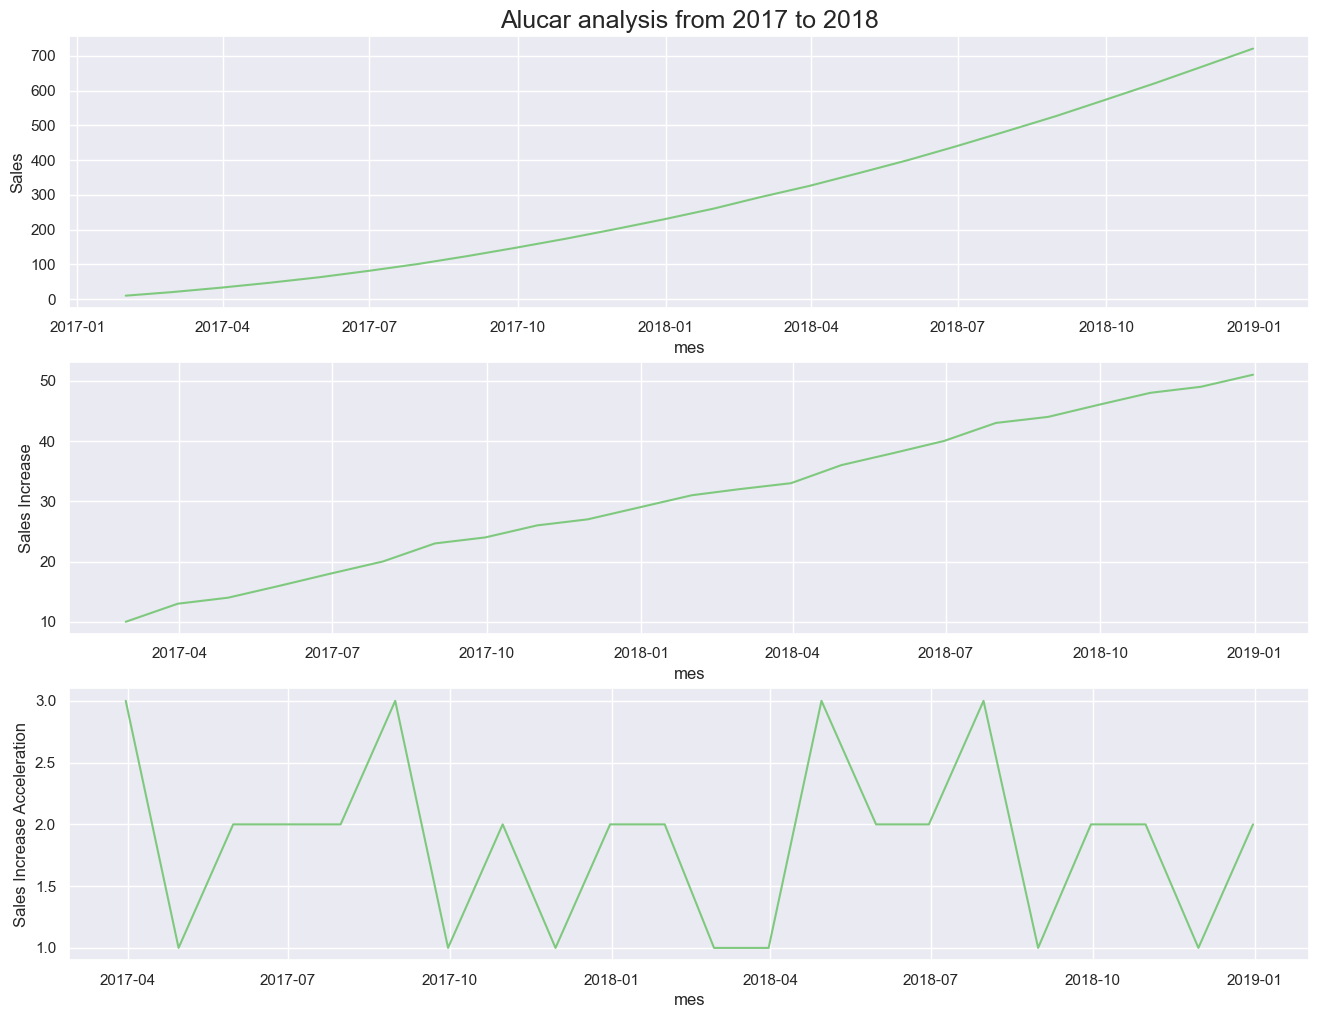

In [106]:
#generating function
def comparison_plot(data, x, y1, y2, y3):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title('Alucar analysis from 2017 to 2018', fontsize=18, loc='center')
    sns.lineplot(x=x,y=y1, data=data)
    ax.set_ylabel('Sales')

    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2, data=data)
    ax.set_ylabel('Sales Increase')

    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3, data=data)
    ax.set_ylabel('Sales Increase Acceleration')

comparison_plot(data=data_alucar, x='mes', y1='vendas', y2='sales_increase', y3='sales_increase_acceleration')

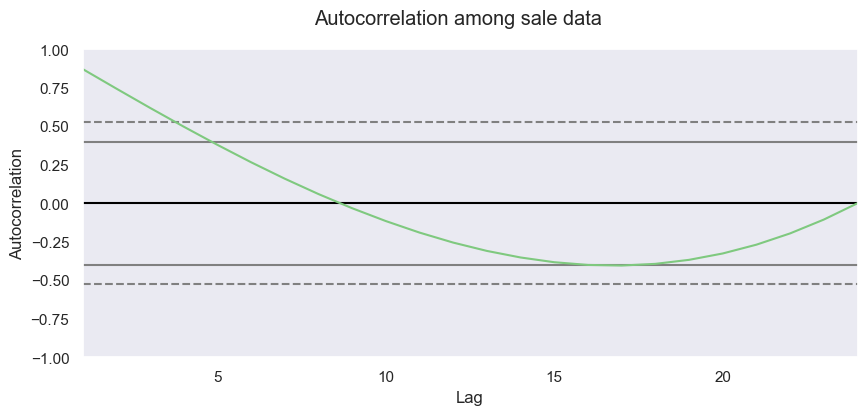

In [64]:
#autocorrelation
ax = plt.figure(figsize=(10,4))
ax.suptitle("Autocorrelation among sales data")
ax = autocorrelation_plot(data_alucar['vendas'])


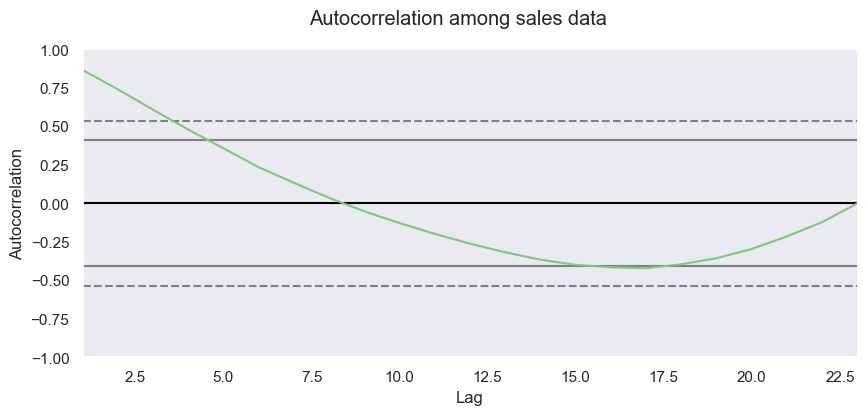

In [67]:
ax = plt.figure(figsize=(10,4))
ax.suptitle("Autocorrelation among sales data")
ax = autocorrelation_plot(data_alucar['sales_increase'][1:])

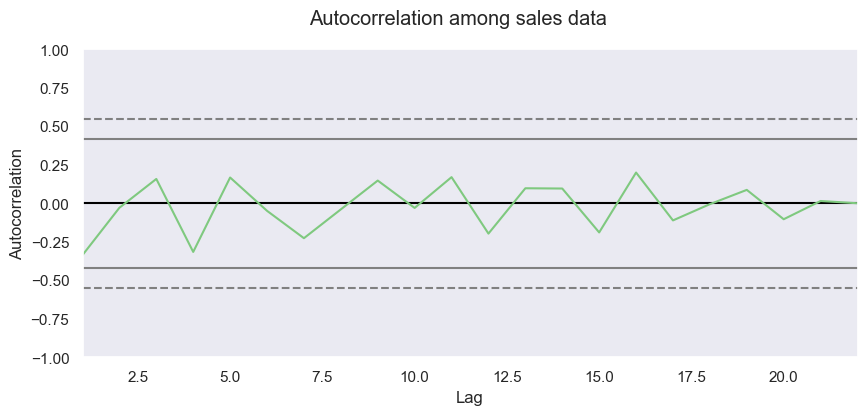

In [68]:
ax = plt.figure(figsize=(10,4))
ax.suptitle("Autocorrelation among sales data")
ax = autocorrelation_plot(data_alucar['sales_increase_acceleration'][2:])

# Class 3

In [70]:
#Analysing newsletter subscribers 
data_subscribers = pd.read_csv("Data/Curso DS14 - Analise de Series Temporais/newsletter_alucar.csv")
data_subscribers.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [79]:
#data info
data_subscribers.describe().round(2)
data_subscribers.shape
data_subscribers.columns
data_subscribers.info()
print(f"Amount of null data: {data_subscribers.isna().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes
Amount of null data: 0


In [80]:
data_subscribers['mes'] = pd.to_datetime(data_subscribers.mes)
data_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   mes         24 non-null     datetime64[ns]
 1   assinantes  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 516.0 bytes


In [82]:
data_subscribers['subscribers_increase'] = data_subscribers['assinantes'].diff()
data_subscribers['subscribers_acceleration_increase'] = data_subscribers['subscribers_increase'].diff()

data_subscribers.head()

,mes,assinantes,subscribers_increase,subscribers_acceleration_increase
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


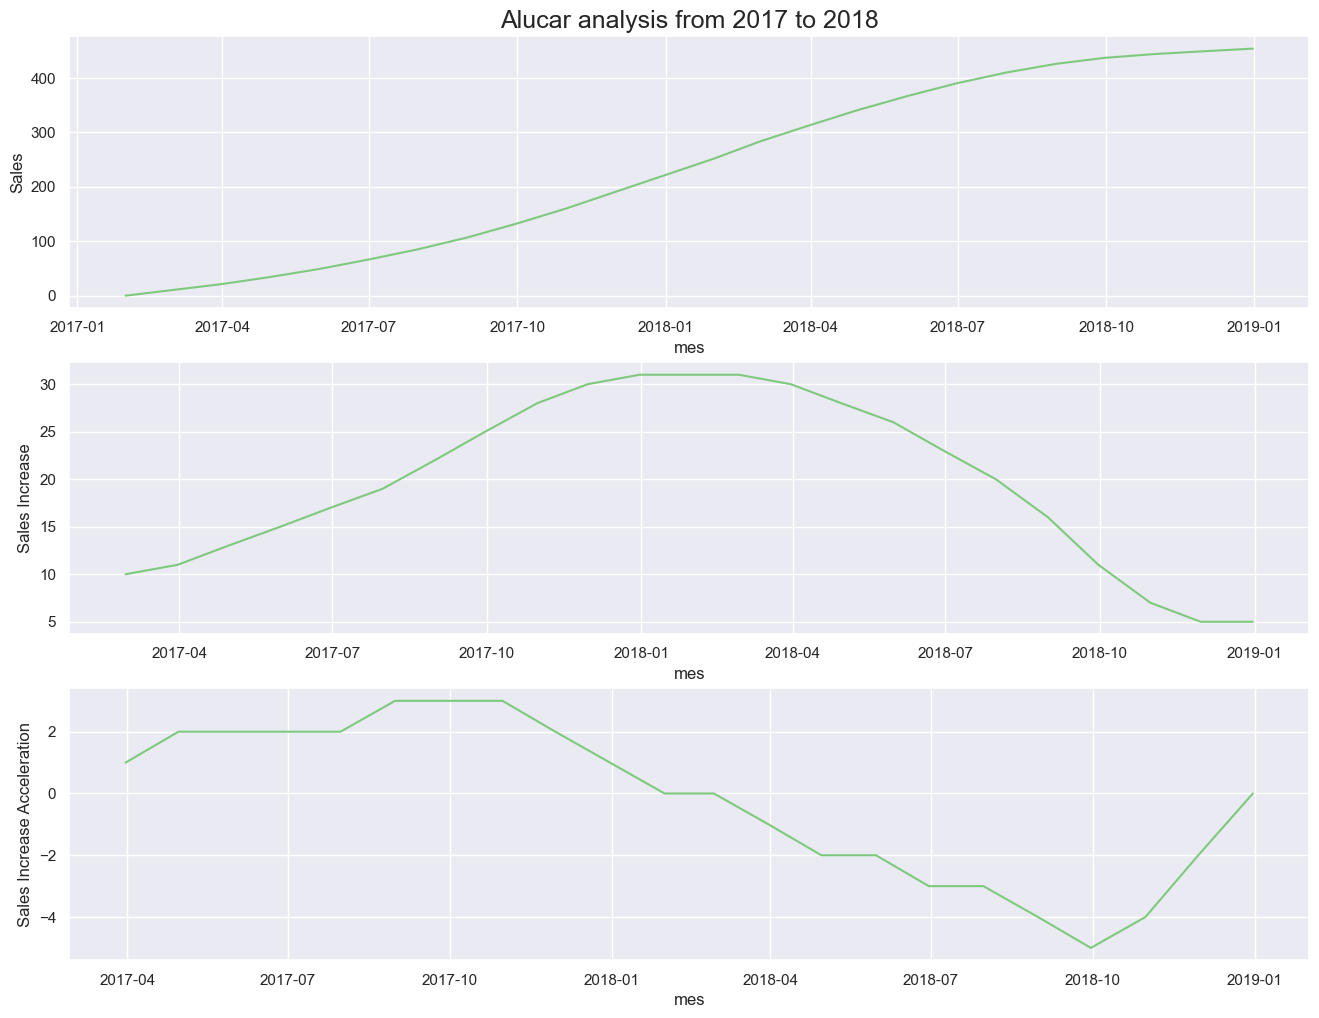

In [83]:
comparison_plot(data=data_subscribers, x='mes', y1='assinantes', y2='subscribers_increase', y3='subscribers_acceleration_increase')

In [143]:
#chocolura 
data_chocolura = pd.read_csv("Data/Curso DS14 - Analise de Series Temporais/chocolura.csv")
data_chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [145]:
data_chocolura.describe().round(2)
data_chocolura.shape
data_chocolura.dtypes
print(f"Amount of null data: {data_chocolura.isna().sum().sum()}")

Amount of null data: 0


In [146]:
data_chocolura.mes = pd.to_datetime(data_chocolura.mes)
data_chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [93]:
data_chocolura['increase_sales'] = data_chocolura.vendas.diff()
data_chocolura['increase_sales_aceleration'] = data_chocolura.increase_sales.diff()
data_chocolura.head()

,mes,vendas,increase_sales,increase_sales_aceleration
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


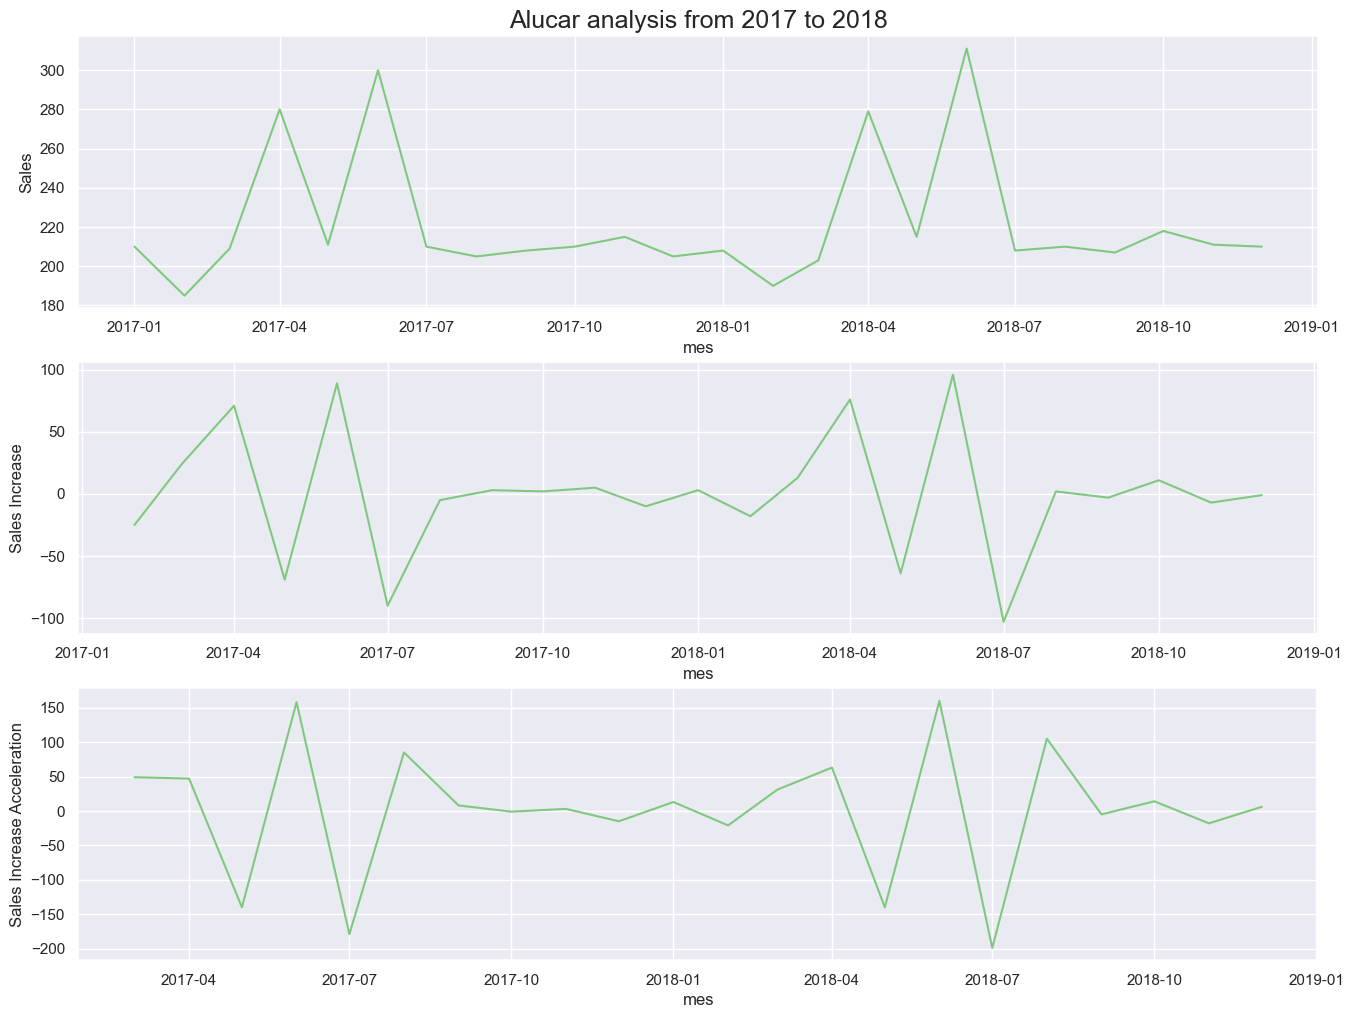

In [95]:
comparison_plot(data=data_chocolura, x='mes', y1='vendas', y2='increase_sales', y3='increase_sales_aceleration')

In [97]:
data_chocolura_por_dia = pd.read_csv("Data/Curso DS14 - Analise de Series Temporais/vendas_por_dia.csv")
data_chocolura_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [98]:
data_chocolura_por_dia.describe().round(2)
data_chocolura_por_dia.shape
data_chocolura_por_dia.dtypes
print(f"Amount of null data: {data_chocolura_por_dia.isna().sum().sum()}")

Amount of null data: 0


In [101]:
data_chocolura_por_dia.dia = pd.to_datetime(data_chocolura.dia)
data_chocolura_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [102]:
data_chocolura_por_dia['increase_sales'] = data_chocolura_por_dia.vendas.diff()
data_chocolura_por_dia['increase_sales_aceleration'] = data_chocolura_por_dia.increase_sales.diff()
data_chocolura_por_dia.head()

,dia,vendas,increase_sales,increase_sales_aceleration
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


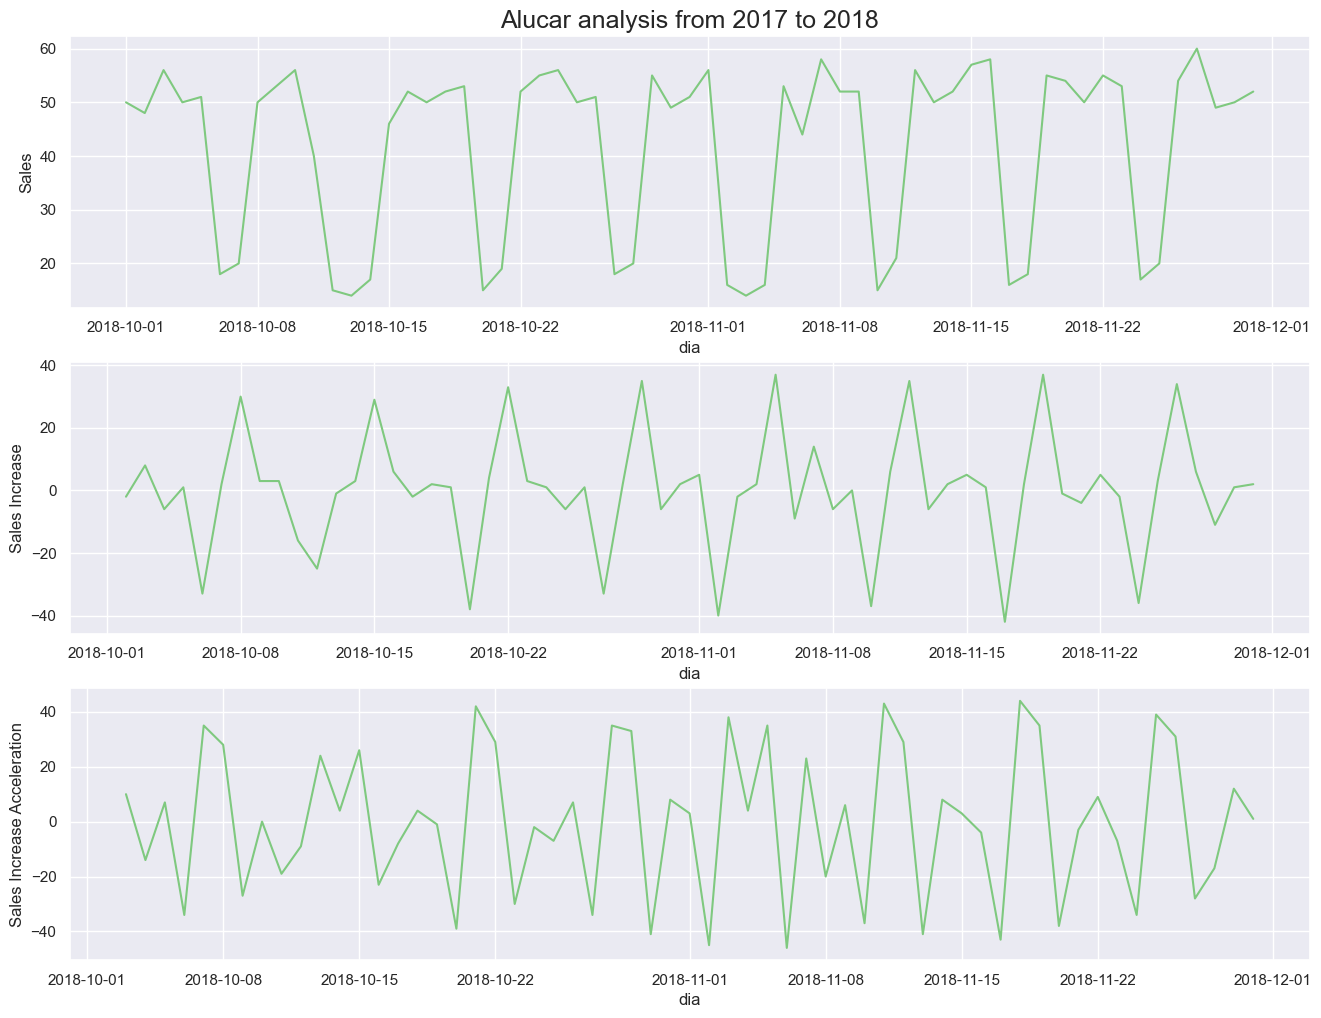

In [107]:
comparison_plot(data=data_chocolura_por_dia, x='dia', y1='vendas', y2='increase_sales', y3='increase_sales_aceleration')

In [114]:
#Analysing sazonality 
data_chocolura_por_dia['weekday'] = data_chocolura_por_dia['dia'].dt.day_name()

data_chocolura_por_dia.head(7)

,dia,vendas,increase_sales,increase_sales_aceleration,weekday
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [120]:
#Grouping days
grouped_sales = data_chocolura_por_dia.groupby('weekday')[['vendas','increase_sales','increase_sales_aceleration']].mean().round()
grouped_sales

,vendas,increase_sales,increase_sales_aceleration
weekday,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0


# Class 4 

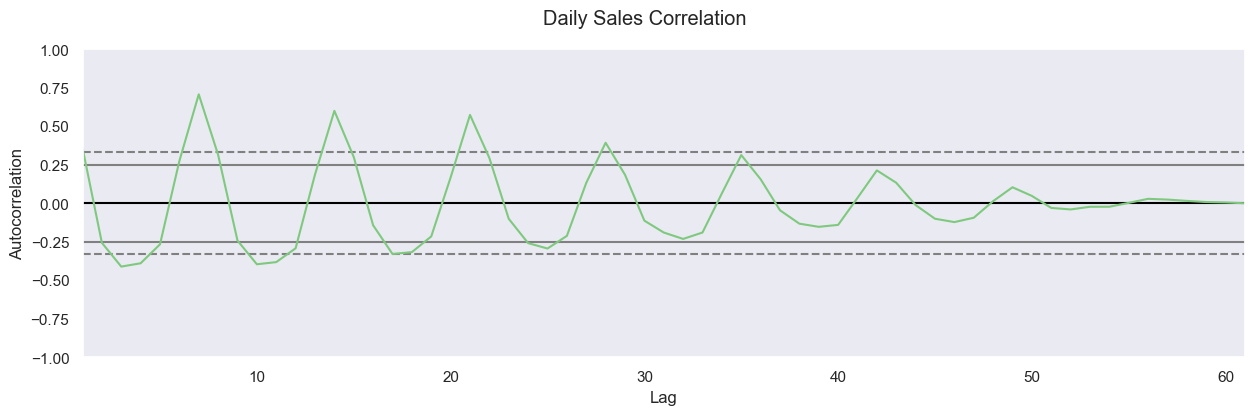

In [121]:
#daily sales autocorrelation 
ax = plt.figure(figsize=(15,4))
ax.suptitle("Daily Sales Correlation")
ax = autocorrelation_plot(data_chocolura_por_dia['vendas'])

<Figure size 2500x400 with 0 Axes>

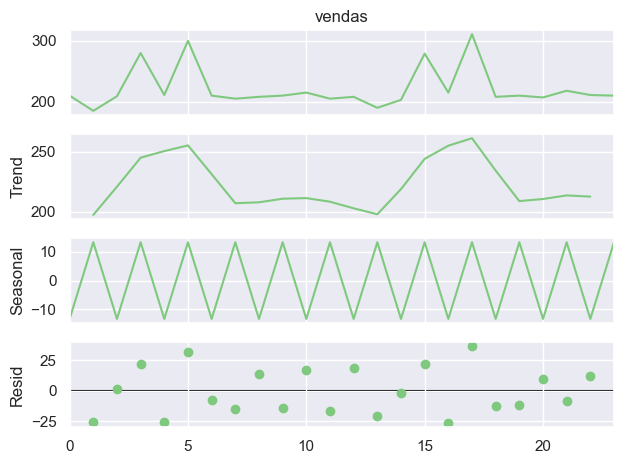

In [147]:
result = sm.tsa.seasonal_decompose(data_chocolura.vendas, period=2)
ax = plt.figure(figsize=(25,4))
ax = result.plot()

In [148]:
observation = result.observed
trend = result.trend
sazonality = result.seasonal
noise = result.resid

data = pd.DataFrame({
    'observation':observation,
    'trend':trend, 
    'sazonality':sazonality,
    'noise':noise
})

data.head()

,observation,trend,sazonality,noise
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


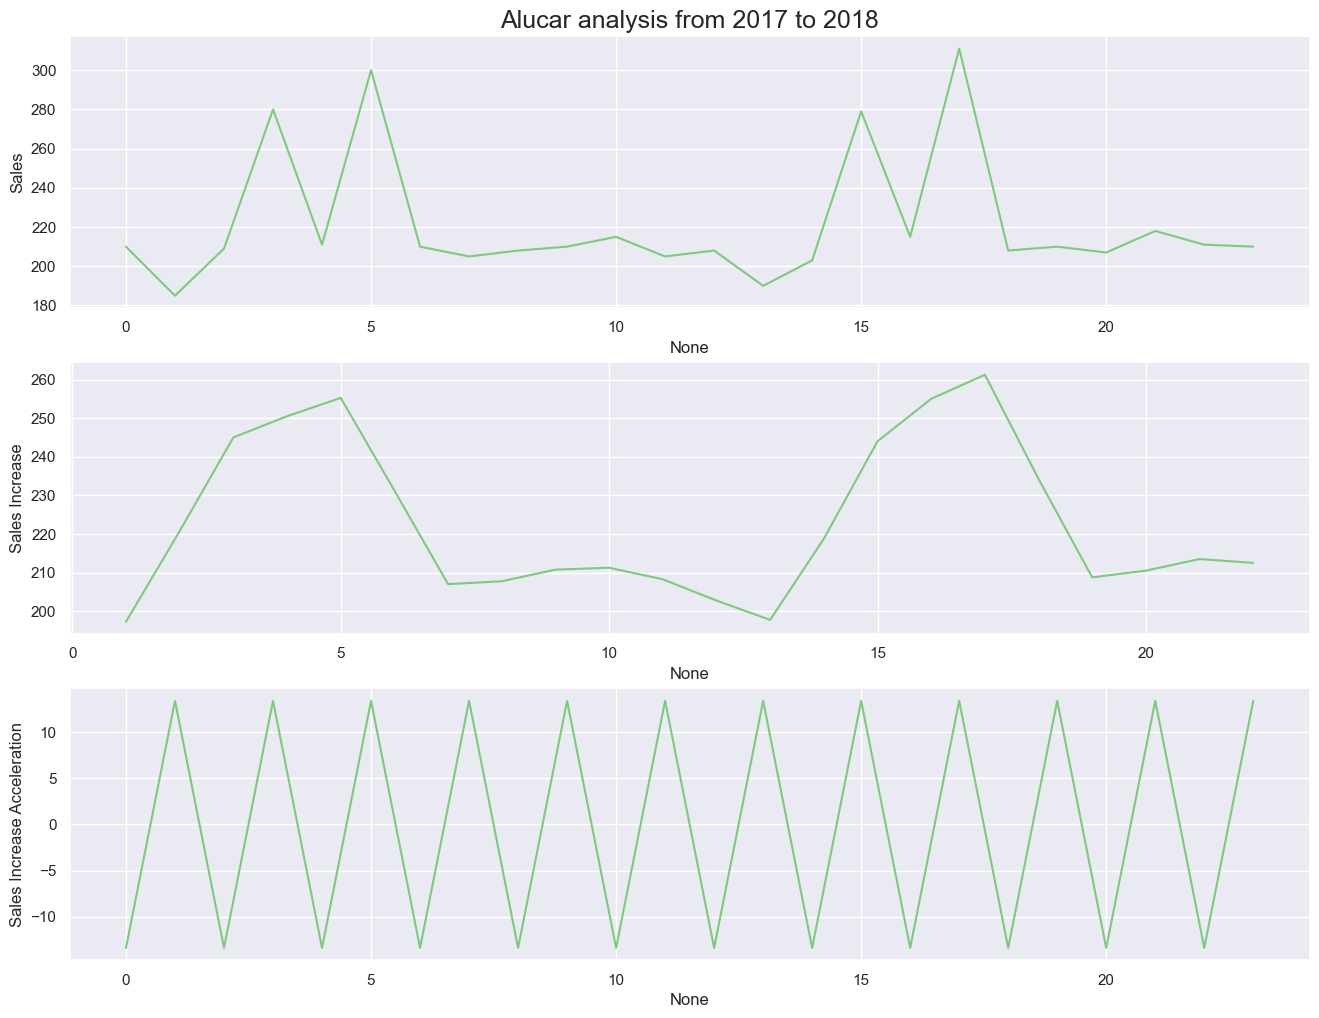

In [150]:
comparison_plot(data=data, x=data.index, y1='observation',y2='trend',y3='sazonality')